## Shape Detection

`Edge Detection :` Now that you've seen how to define and use image filters for smoothing images and detecting the edges (high-frequency) components of objects in an image, let's move one step further. The next few videos will be all about how we can use what we know about pattern recognition in images to begin identifying unique shapes and then objects.



`Edges to Boundaries and Shapes :` 
+ We know how to detect the edges of objects in images, but how can we begin to find unifying boundaries around the object ?
+ We'll want to be  able to do this to separate and locate multiple objects in the given image.
+ Next we will discuss the Hough space where you can easily identify simple boundaries like lines and circles
+ The Hough transform is used in a variety of shape recognition applications, as seen in the images pictured below.

  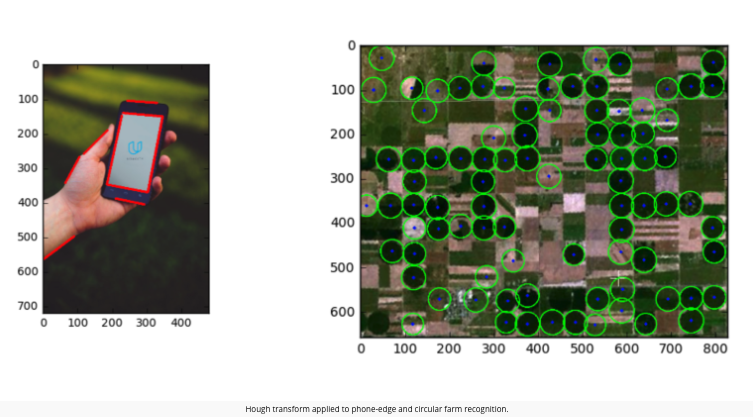

  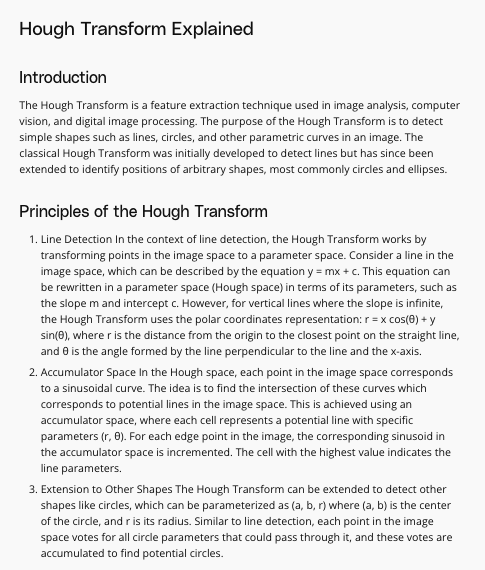 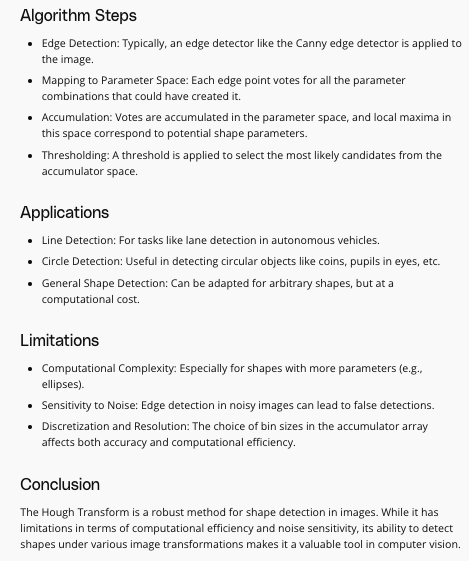

  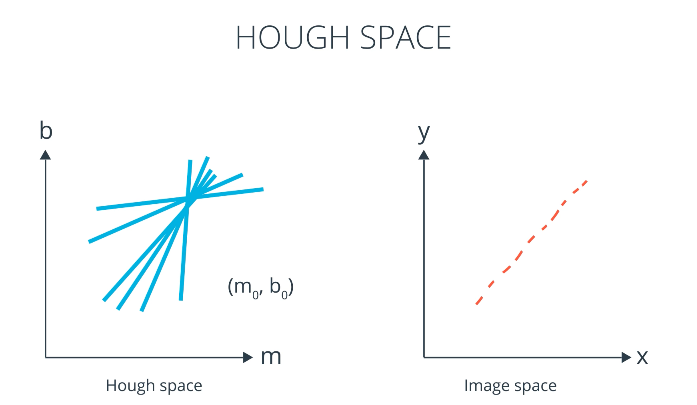 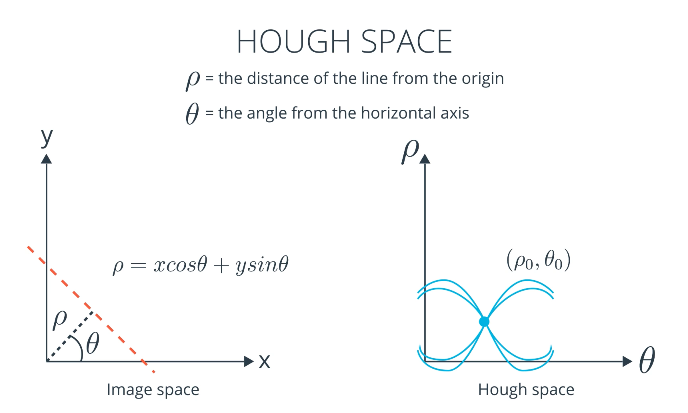

## Hough Line Detection

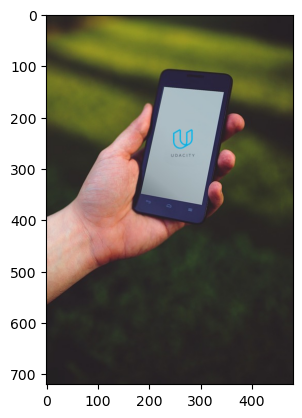

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

%matplotlib inline 

#Read in the image
image = cv2.imread('images/phone.jpg')

#Make a copy of the image
image_copy = np.copy(image)

#Chnage color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

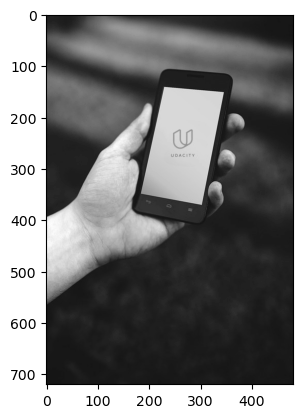

In [2]:
### Hough Line Detection
# Convert the image to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### Perform edge detection

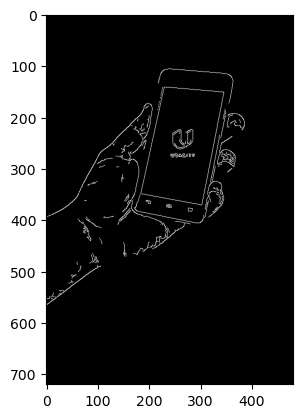

In [7]:
# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

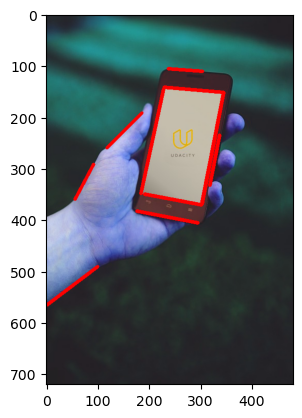

In [9]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

## Object Recognition & Introducing Haar Cascades

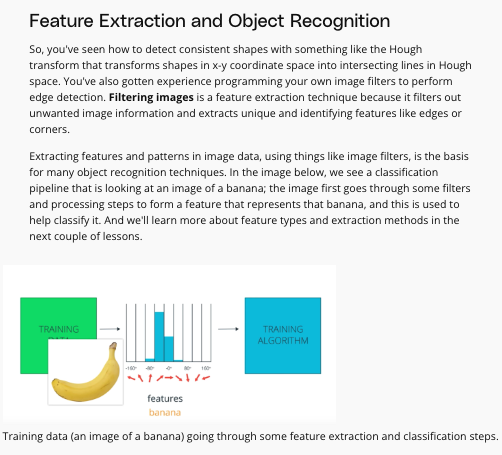 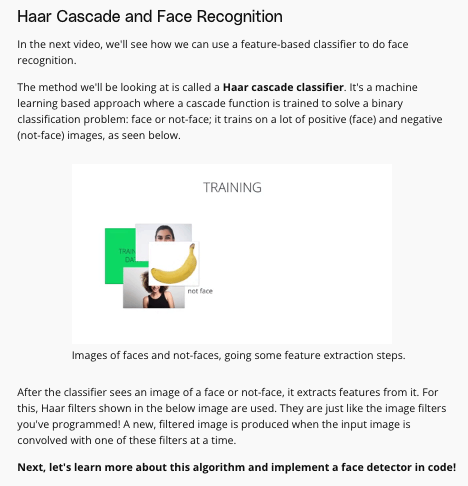

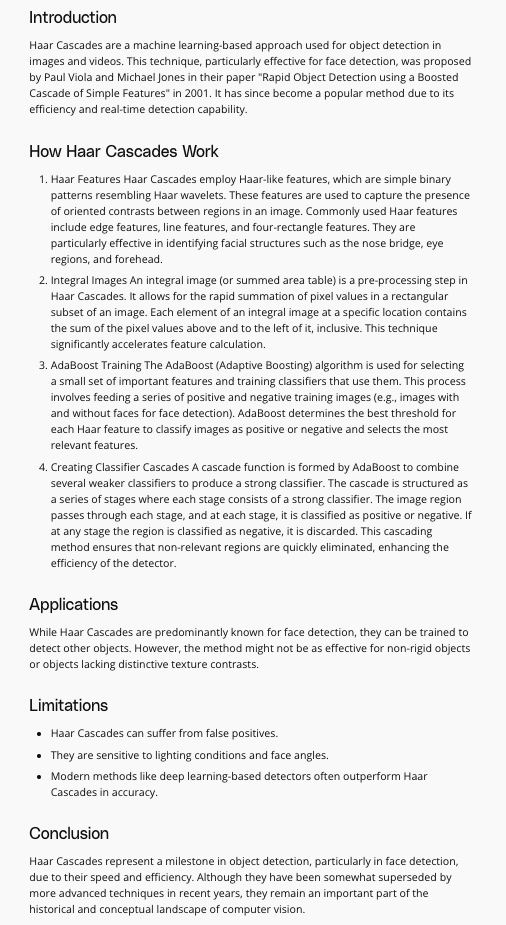

## Face detection using OpenCV

One older (from around 2001), but still popular scheme for face detection is a Haar cascade classifier; these classifiers in the OpenCV library and use feature-based classification cascades that learn to isolate and detect faces in an image. You can read [the original paper proposing this approach here](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf).

Let's see how face detection works on an exampe in this notebook.

In [10]:
# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2                    

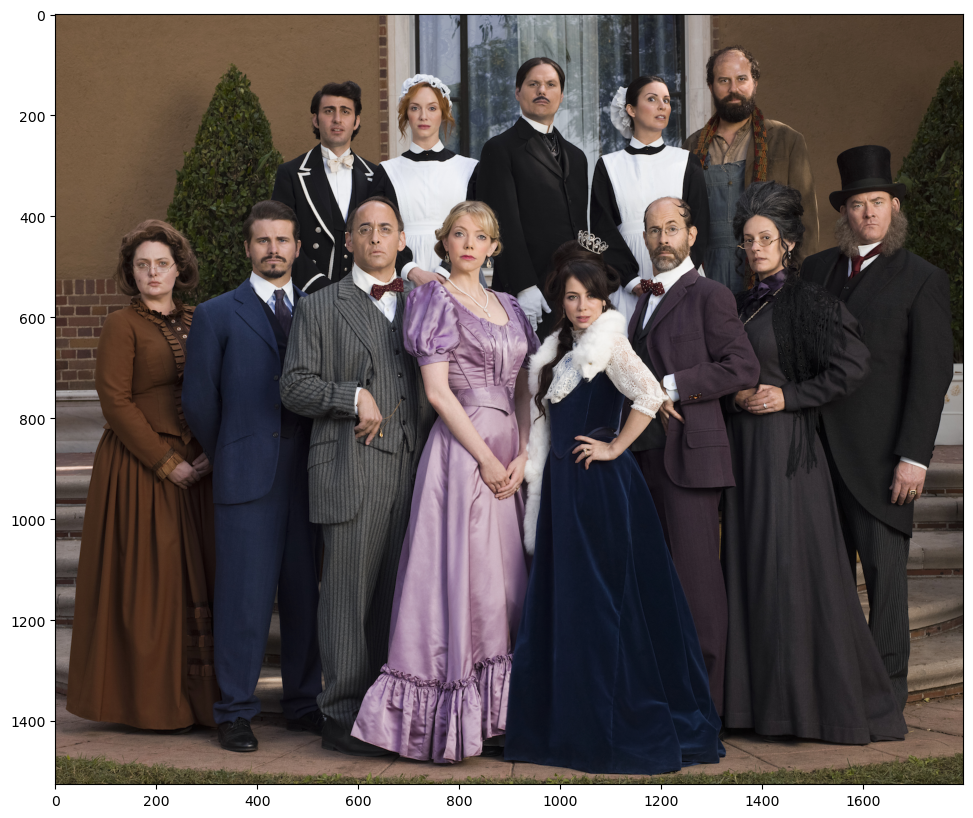

In [11]:
# load in color image for face detection
image = cv2.imread('images/multi_faces.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

To use a face detector, we'll first convert the image from color to grayscale.  For face detection this is perfectly fine to do as there is plenty non-color specific structure in the human face for our detector to learn on.

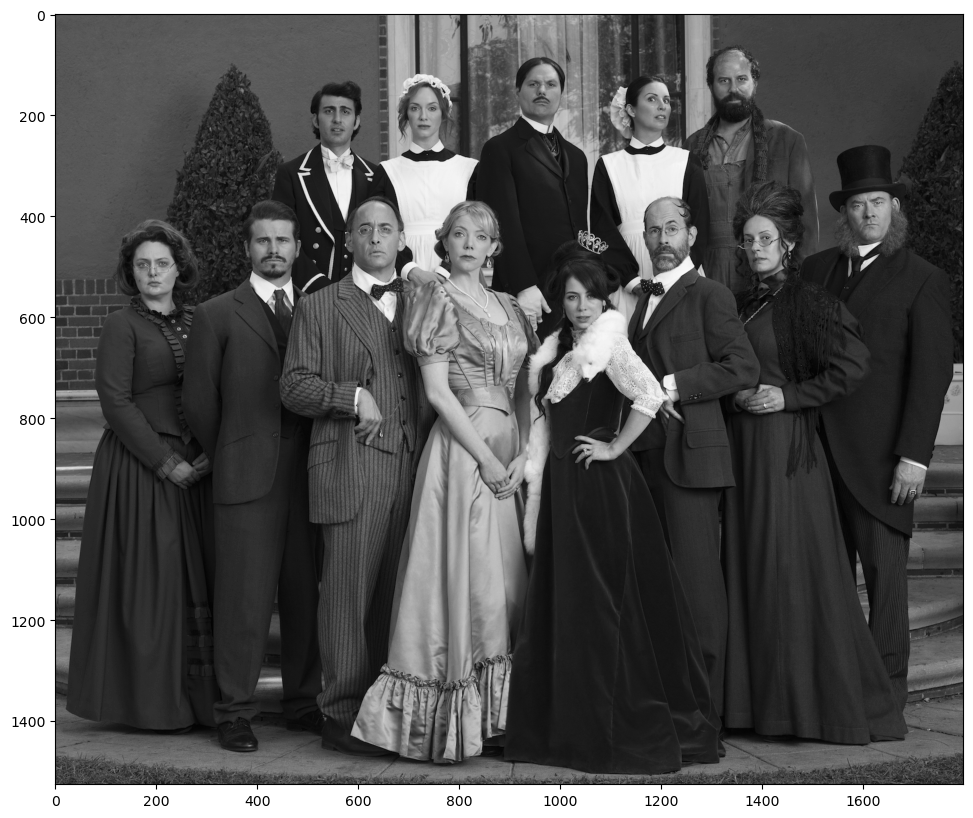

In [12]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

Next we load in the fully trained architecture of the face detector, found in the file `detector_architectures/ haarcascade_frontalface_default.xml`,and use it on our image to find faces!

**A note on parameters** 

How many faces are detected is determined by the function, `detectMultiScale` which aims to detect faces of varying sizes. The inputs to this function are: `(image, scaleFactor, minNeighbors)`; you will often detect more faces with a smaller scaleFactor, and lower value for minNeighbors, but raising these values often produces better matches. Modify these values depending on your input image.

In [14]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)

The output of the classifier is an array of detections; coordinates that define the dimensions of a bounding box around each face. Note that this always outputs a bounding box that is square in dimension.

In [15]:
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 13 faces in this image
Their coordinates and lengths/widths are as follows
[[1295   94   96   96]
 [ 917  102   96   96]
 [1148  131   96   96]
 [ 683  149   96   96]
 [1565  339   96   96]
 [ 510  158   96   96]
 [ 588  390   96   96]
 [ 146  458   96   96]
 [1157  391   96   96]
 [ 383  414   96   96]
 [ 771  405   96   96]
 [ 996  526   96   96]
 [1345  411   96   96]]


Let's plot the corresponding detection boxes on our original image to see how well we've done.  

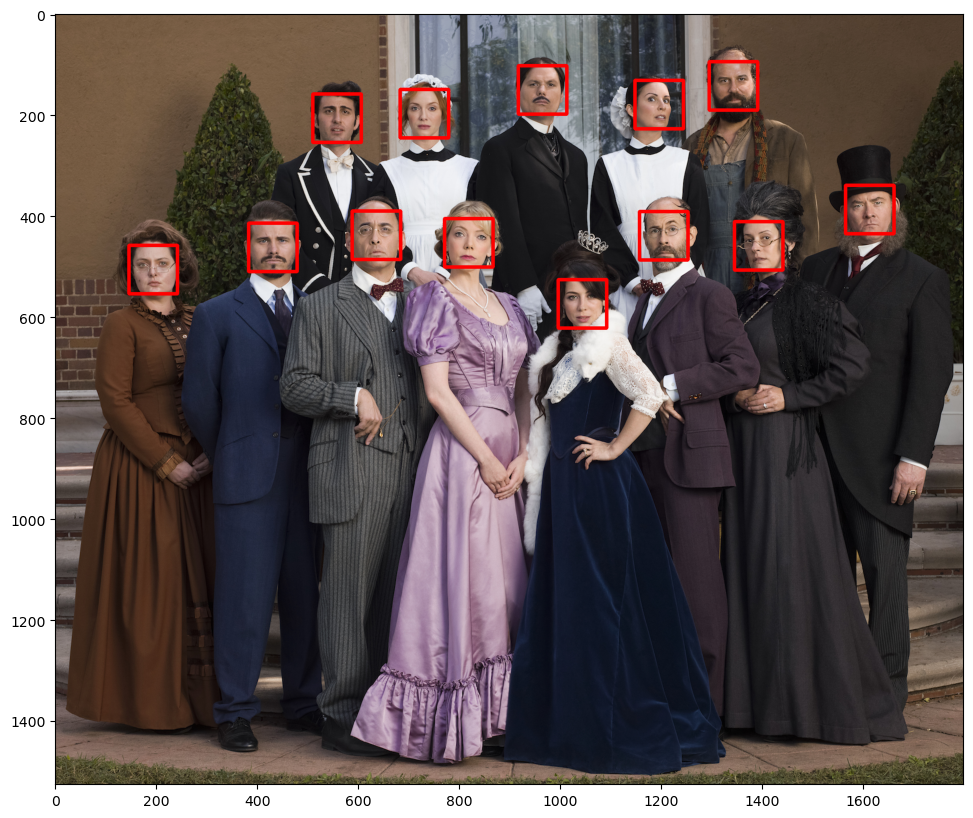

In [16]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)